In [ ]:
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x6 = '/content/drive/My Drive/DSCI599/project-599/clean_data.csv'
data = pd.read_csv(x6)

In [ ]:
data['month_booked'] = data['month_booked'].apply(ast.literal_eval)

# Create columns for each month and count occurrences
for month_num in range(1, 13):
    data[f'month_{month_num}'] = data['month_booked'].apply(lambda x: x.count(month_num))

In [ ]:
data.drop(columns=['month_booked'], inplace=True)

In [ ]:
boolean_columns = data.select_dtypes(include=['bool']).columns

label_encoder = LabelEncoder()
for col in boolean_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
def label_encode_categorical(data):
    # Create a copy of the DataFrame to avoid modifying the original
    encoded_df = data.copy()

    # Iterate over columns and encode categorical ones
    for col in encoded_df.columns:
        if encoded_df[col].dtype == 'object':
            try:
                label_encoder = LabelEncoder()
                encoded_df[col] = label_encoder.fit_transform(encoded_df[col])
            except Exception as e:
                print(f"Error occurred while encoding column '{col}': {e}")

    return encoded_df

data = label_encode_categorical(data)
print("Encoded DataFrame")

Encoded DataFrame


In [ ]:
label_encoder = LabelEncoder()
data['EncodedZip'] = label_encoder.fit_transform(data['zipcode'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32625 entries, 0 to 32624
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   32625 non-null  int64  
 1   host_id                      32625 non-null  int64  
 2   host_since                   32625 non-null  int64  
 3   host_response_time           32625 non-null  int64  
 4   host_response_rate           32625 non-null  float64
 5   host_acceptance_rate         32625 non-null  float64
 6   host_is_superhost            32625 non-null  int64  
 7   host_has_profile_pic         32625 non-null  int64  
 8   minimum_nights               32625 non-null  int64  
 9   maximum_nights               32625 non-null  int64  
 10  host_identity_verified       32625 non-null  int64  
 11  property_type                32625 non-null  int64  
 12  room_type                    32625 non-null  int64  
 13  accommodates    

In [ ]:
data.columns

Index(['listing_id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'minimum_nights', 'maximum_nights',
       'host_identity_verified', 'property_type', 'room_type', 'accommodates',
       'amenities', 'beds', 'price', 'availability_30', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'latitude', 'longitude',
       'zipcode', 'num_crimes', 'num_nearby_attractions', 'num_bookings',
       'num_amenities', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'EncodedZip'],
      dtype='object')

In [ ]:
X = data[['minimum_nights', 'maximum_nights',
       'property_type', 'room_type', 'accommodates', 'beds', 'price',
       'instant_bookable', 'zipcode', 'num_crimes', 'num_nearby_attractions',
       'num_amenities']]
y = data['num_bookings']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['minimum_nights', 'maximum_nights', 'property_type', 'room_type',
       'accommodates', 'beds', 'price', 'instant_bookable', 'EncodedZip',
       'num_crimes', 'num_nearby_attractions',
       'num_amenities']]
y = data['num_bookings']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100,
                               random_state=100,
                               max_depth=10,
                               min_samples_split=5,
                               min_samples_leaf=2,
                               max_features='sqrt',
                               bootstrap=True)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

train_rmse_list, train_r2_list = [], []
rf_test_rmse_list, rf_test_r2_list = [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate RMSE and R2 for training set
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_rmse_list.append(train_rmse)
    train_r2 = r2_score(y_train, y_pred_train)
    train_r2_list.append(train_r2)

    # Calculate RMSE and R2 for testing set
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    rf_test_rmse_list.append(test_rmse)
    rf_test_r2 = r2_score(y_test, y_pred_test)
    rf_test_r2_list.append(rf_test_r2)

# Print evaluation metrics
print("Training RMSE:", np.mean(train_rmse_list))
print("Training R2 Score:", np.mean(train_r2_list))
print("Testing RMSE:", np.mean(rf_test_rmse_list))
print("Testing R2 Score:", np.mean(rf_test_r2_list))


Training RMSE: 67.82310725953428
Training R2 Score: 0.33829928841205076
Testing RMSE: 73.62507536901845
Testing R2 Score: 0.21867748618051244


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['minimum_nights', 'maximum_nights', 'property_type', 'room_type',
       'accommodates', 'beds', 'price', 'instant_bookable', 'EncodedZip',
       'num_crimes', 'num_nearby_attractions',
       'num_amenities']]
y = data['num_bookings']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the XGBoost Regressor
model = XGBRegressor(n_estimators=100,
                     random_state=42,
                     max_depth=6,
                     learning_rate=0.1,
                     subsample=0.8,
                     colsample_bytree=0.8)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_rmse_list, train_r2_list = [], []
xg_test_rmse_list, xg_test_r2_list = [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate RMSE and R2 for training set
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_rmse_list.append(train_rmse)
    train_r2 = r2_score(y_train, y_pred_train)
    train_r2_list.append(train_r2)

    # Calculate RMSE and R2 for testing set
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    xg_test_rmse_list.append(test_rmse)
    test_r2 = r2_score(y_test, y_pred_test)
    xg_test_r2_list.append(test_r2)

# Print evaluation metrics
print("Training RMSE:", np.mean(train_rmse_list))
print("Training R2 Score:", np.mean(train_r2_list))
print("Testing RMSE:", np.mean(xg_test_rmse_list))
print("Testing R2 Score:", np.mean(xg_test_r2_list))


Training RMSE: 64.24933748142931
Training R2 Score: 0.40610701071171207
Testing RMSE: 72.45977580494625
Testing R2 Score: 0.2432955336807181


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['minimum_nights', 'maximum_nights', 'property_type', 'room_type',
       'accommodates', 'beds', 'price', 'instant_bookable', 'EncodedZip',
       'num_crimes', 'num_nearby_attractions',
       'num_amenities']]
y = data['num_bookings']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the Linear Regression model
model = LinearRegression()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_train_rmse_list, train_r2_list = [], []
lr_test_rmse_list, lr_test_r2_list = [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate RMSE and R2 for training set
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_rmse_list.append(train_rmse)
    train_r2 = r2_score(y_train, y_pred_train)
    train_r2_list.append(train_r2)

    # Calculate RMSE and R2 for testing set
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    lr_test_rmse_list.append(test_rmse)
    test_r2 = r2_score(y_test, y_pred_test)
    lr_test_r2_list.append(test_r2)

# Print evaluation metrics
print("Training RMSE:", np.mean(train_rmse_list))
print("Training R2 Score:", np.mean(train_r2_list))
print("Testing RMSE:", np.mean(lr_test_rmse_list))
print("Testing R2 Score:", np.mean(lr_test_r2_list))


Training RMSE: 73.02047430822115
Training R2 Score: 0.037612505512097716
Testing RMSE: 81.81099660021168
Testing R2 Score: 0.03580056987068068


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['minimum_nights', 'maximum_nights', 'property_type', 'room_type',
       'accommodates', 'beds', 'price', 'instant_bookable', 'EncodedZip',
       'num_crimes', 'num_nearby_attractions',
       'num_amenities']]
y = data['num_bookings']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the CatBoost Regressor
model = CatBoostRegressor(iterations=1000,  # Number of boosting iterations
                          learning_rate=0.1,  # Learning rate
                          depth=7,  # Depth of trees
                          loss_function='RMSE',  # Loss function
                          random_seed=42,  # Random seed for reproducibility
                          verbose=False)  # Whether to print the training progress

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_rmse_list, train_r2_list = [], []
cat_test_rmse_list, cat_test_r2_list = [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate RMSE and R2 for training set
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_rmse_list.append(train_rmse)
    train_r2 = r2_score(y_train, y_pred_train)
    train_r2_list.append(train_r2)

    # Calculate RMSE and R2 for testing set
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    cat_test_rmse_list.append(test_rmse)
    test_r2 = r2_score(y_test, y_pred_test)
    cat_test_r2_list.append(test_r2)

# Print evaluation metrics
print("Training RMSE:", np.mean(train_rmse_list))
print("Training R2 Score:", np.mean(train_r2_list))
print("Testing RMSE:", np.mean(cat_test_rmse_list))
print("Testing R2 Score:", np.mean(cat_test_r2_list))


Training RMSE: 54.9648953132256
Training R2 Score: 0.5653188654780328
Testing RMSE: 72.03133042326934
Testing R2 Score: 0.25186229949033195


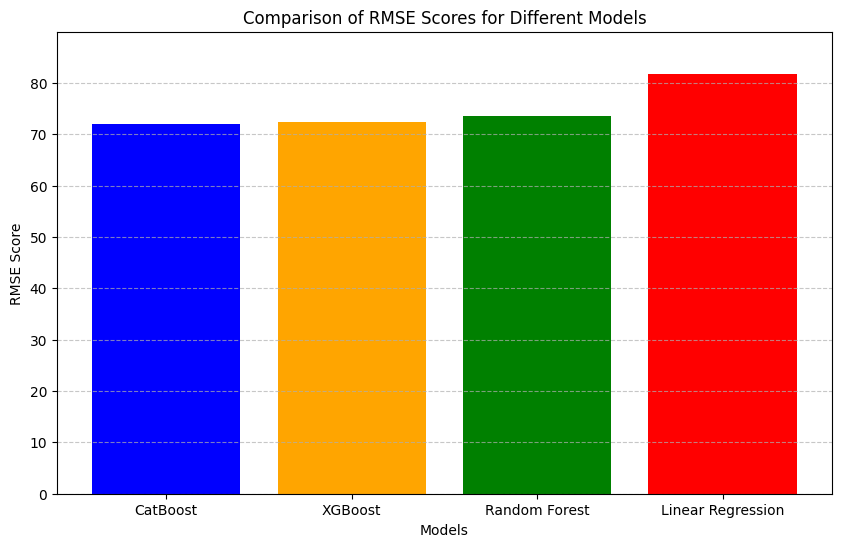

In [ ]:
# Calculate mean RMSE scores for each model
cat_test_rmse_mean = np.mean(cat_test_rmse_list)
xg_test_rmse_mean = np.mean(xg_test_rmse_list)
rf_test_rmse_mean = np.mean(rf_test_rmse_list)
lr_test_rmse_mean = np.mean(lr_test_rmse_list)

# Model names
models = ['CatBoost', 'XGBoost', 'Random Forest', 'Linear Regression']

# Mean RMSE scores
rmse_scores = [cat_test_rmse_mean, xg_test_rmse_mean, rf_test_rmse_mean, lr_test_rmse_mean]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['blue', 'orange', 'green', 'red'])
plt.title('Comparison of RMSE Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.ylim(0, max(rmse_scores) * 1.1)  # Setting y-axis limit to show all bars clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

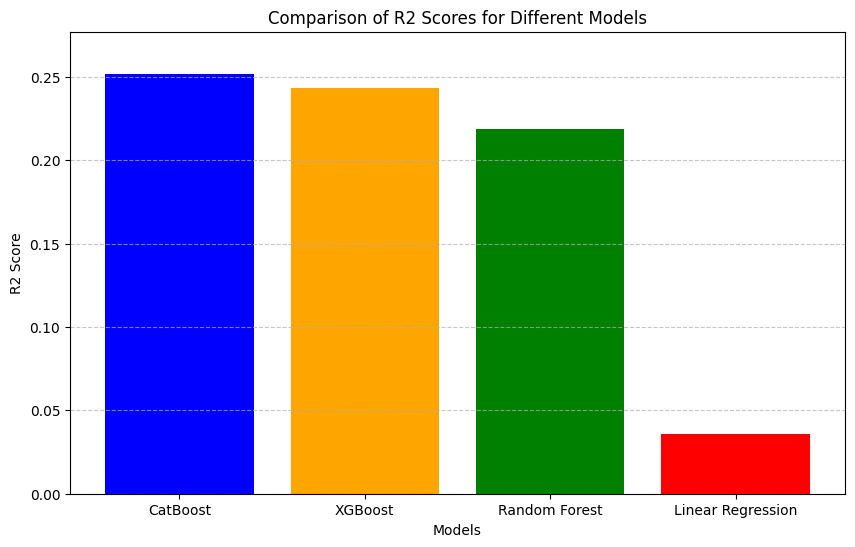

In [ ]:
# Calculate mean RMSE scores for each model
cat_test_rmse_mean = np.mean(cat_test_r2_list)
xg_test_rmse_mean = np.mean(xg_test_r2_list)
rf_test_rmse_mean = np.mean(rf_test_r2_list)
lr_test_rmse_mean = np.mean(lr_test_r2_list)

# Model names
models = ['CatBoost', 'XGBoost', 'Random Forest', 'Linear Regression']

# Mean RMSE scores
rmse_scores = [cat_test_rmse_mean, xg_test_rmse_mean, rf_test_rmse_mean, lr_test_rmse_mean]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['blue', 'orange', 'green', 'red'])
plt.title('Comparison of R2 Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.ylim(0, max(rmse_scores) * 1.1)  # Setting y-axis limit to show all bars clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'random_forest_model_1.pkl')


['random_forest_model_1.pkl']

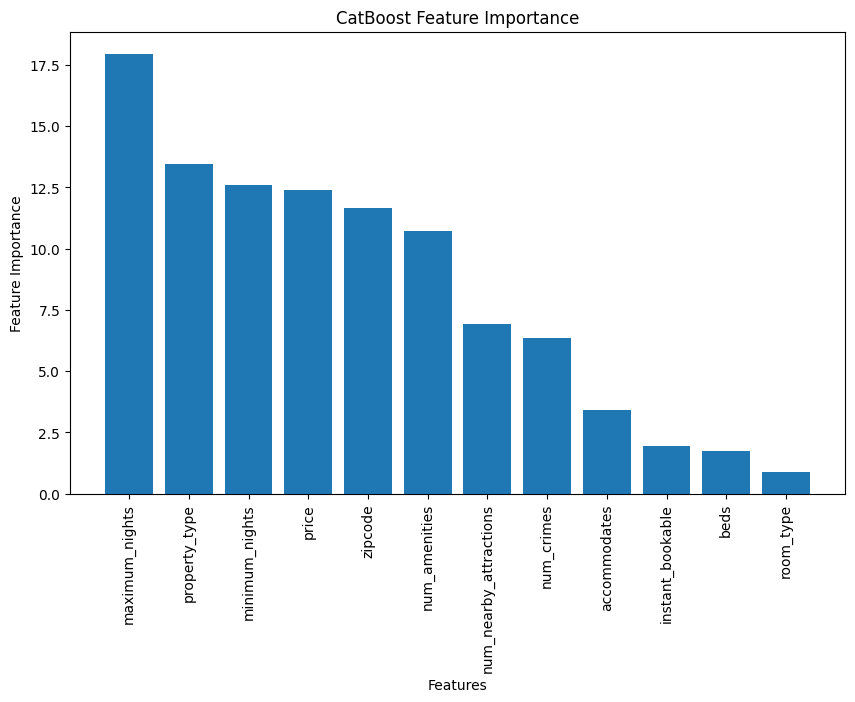

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = model.feature_importances_

feature_names = ['minimum_nights', 'maximum_nights',
       'property_type', 'room_type', 'accommodates', 'beds', 'price',
       'instant_bookable', 'zipcode', 'num_crimes', 'num_nearby_attractions', 'num_amenities', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12']

# Get feature names
feature_names = feature_names

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()


# Essential features with months booked data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['minimum_nights', 'maximum_nights', 'property_type', 'room_type',
       'accommodates', 'beds', 'price', 'instant_bookable', 'EncodedZip',
       'num_crimes', 'num_nearby_attractions',
       'num_amenities',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]

y = data['num_bookings']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100,
                               random_state=100,
                               max_depth=5,
                               min_samples_split=5,
                               min_samples_leaf=2,
                               max_features='sqrt',
                               bootstrap=True)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

train_rmse_list, train_r2_list = [], []
rf_test_rmse_list, rf_test_r2_list = [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate RMSE and R2 for training set
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_rmse_list.append(train_rmse)
    train_r2 = r2_score(y_train, y_pred_train)
    train_r2_list.append(train_r2)

    # Calculate RMSE and R2 for testing set
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    rf_test_rmse_list.append(test_rmse)
    rf_test_r2 = r2_score(y_test, y_pred_test)
    rf_test_r2_list.append(rf_test_r2)

# Print evaluation metrics
print("Training RMSE:", np.mean(train_rmse_list))
print("Training R2 Score:", np.mean(train_r2_list))
print("Testing RMSE:", np.mean(rf_test_rmse_list))
print("Testing R2 Score:", np.mean(rf_test_r2_list))

Training RMSE: 5.533577449293309
Training R2 Score: 0.9955945676993958
Testing RMSE: 5.98435147427705
Testing R2 Score: 0.9948244943303376


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['minimum_nights', 'maximum_nights', 'property_type', 'room_type',
       'accommodates', 'beds', 'price', 'instant_bookable', 'EncodedZip',
       'num_crimes', 'num_nearby_attractions',
       'num_amenities',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y = data['num_bookings']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the XGBoost Regressor
model = XGBRegressor(n_estimators=50,
                     random_state=42,
                     max_depth=5,
                     learning_rate=0.1,
                     subsample=0.8,
                     colsample_bytree=0.8)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_rmse_list, train_r2_list = [], []
xg_test_rmse_list, xg_test_r2_list = [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate RMSE and R2 for training set
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_rmse_list.append(train_rmse)
    train_r2 = r2_score(y_train, y_pred_train)
    train_r2_list.append(train_r2)

    # Calculate RMSE and R2 for testing set
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    xg_test_rmse_list.append(test_rmse)
    test_r2 = r2_score(y_test, y_pred_test)
    xg_test_r2_list.append(test_r2)

# Print evaluation metrics
print("Training RMSE:", np.mean(train_rmse_list))
print("Training R2 Score:", np.mean(train_r2_list))
print("Testing RMSE:", np.mean(xg_test_rmse_list))
print("Testing R2 Score:", np.mean(xg_test_r2_list))


Training RMSE: 2.6239523794670765
Training R2 Score: 0.9990093702825705
Testing RMSE: 3.9372596757086504
Testing R2 Score: 0.9977167118721519


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['minimum_nights', 'maximum_nights', 'property_type', 'room_type',
       'accommodates', 'beds', 'price', 'instant_bookable', 'EncodedZip',
       'num_crimes', 'num_nearby_attractions',
       'num_amenities',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]

y = data['num_bookings']

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the CatBoost Regressor
model = CatBoostRegressor(iterations=50,  # Number of boosting iterations
                          learning_rate=0.1,  # Learning rate
                          depth=3,  # Depth of trees
                          loss_function='RMSE',  # Loss function
                          random_seed=42,  # Random seed for reproducibility
                          verbose=False)  # Whether to print the training progress

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_rmse_list, train_r2_list = [], []
cat_test_rmse_list, cat_test_r2_list = [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate RMSE and R2 for training set
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    train_rmse_list.append(train_rmse)
    train_r2 = r2_score(y_train, y_pred_train)
    train_r2_list.append(train_r2)

    # Calculate RMSE and R2 for testing set
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    cat_test_rmse_list.append(test_rmse)
    test_r2 = r2_score(y_test, y_pred_test)
    cat_test_r2_list.append(test_r2)

# Print evaluation metrics
print("Training RMSE:", np.mean(train_rmse_list))
print("Training R2 Score:", np.mean(train_r2_list))
print("Testing RMSE:", np.mean(cat_test_rmse_list))
print("Testing R2 Score:", np.mean(cat_test_r2_list))


Training RMSE: 5.997598273087904
Training R2 Score: 0.9948238624532723
Testing RMSE: 6.602966270178567
Testing R2 Score: 0.9936591866620992


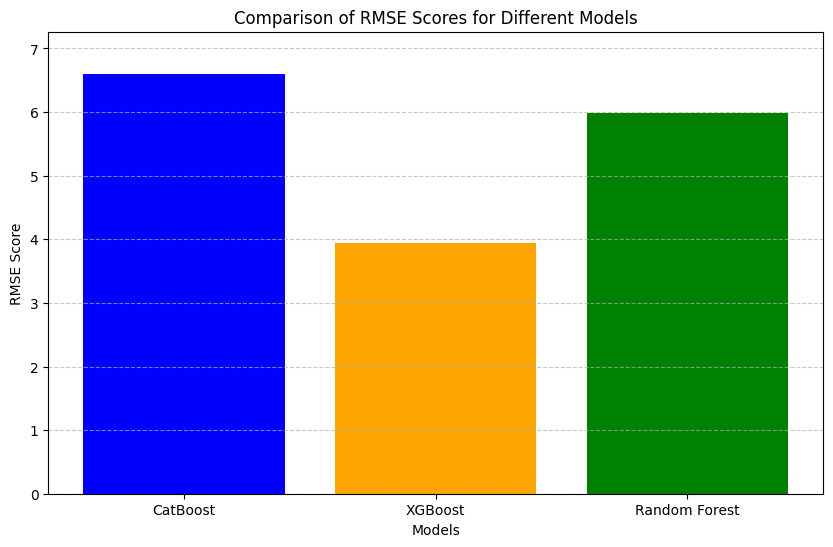

In [ ]:
# Calculate mean RMSE scores for each model
cat_test_rmse_mean = np.mean(cat_test_rmse_list)
xg_test_rmse_mean = np.mean(xg_test_rmse_list)
rf_test_rmse_mean = np.mean(rf_test_rmse_list)

# Model names
models = ['CatBoost', 'XGBoost', 'Random Forest']

# Mean RMSE scores
rmse_scores = [cat_test_rmse_mean, xg_test_rmse_mean, rf_test_rmse_mean]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['blue', 'orange', 'green'])
plt.title('Comparison of RMSE Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.ylim(0, max(rmse_scores) * 1.1)  # Setting y-axis limit to show all bars clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

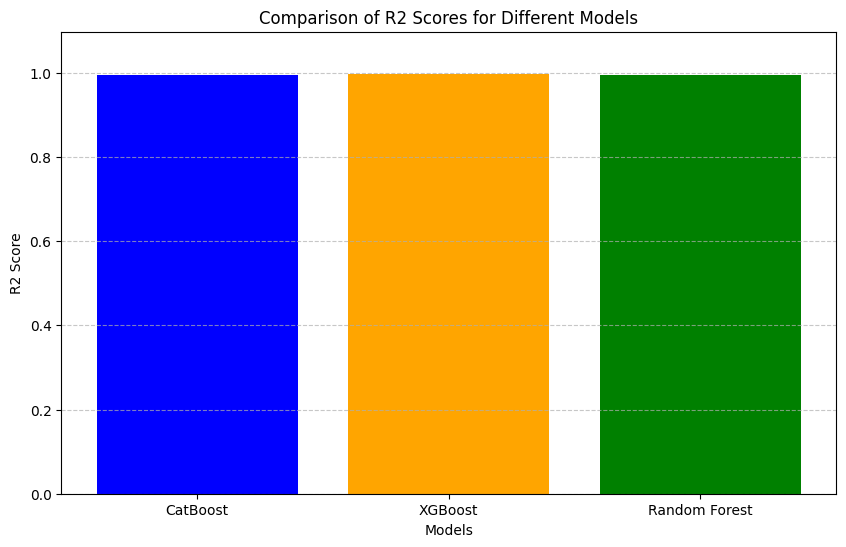

In [ ]:
# Calculate mean RMSE scores for each model
cat_test_rmse_mean = np.mean(cat_test_r2_list)
xg_test_rmse_mean = np.mean(xg_test_r2_list)
rf_test_rmse_mean = np.mean(rf_test_r2_list)

# Model names
models = ['CatBoost', 'XGBoost', 'Random Forest']

# Mean RMSE scores
rmse_scores = [cat_test_rmse_mean, xg_test_rmse_mean, rf_test_rmse_mean]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['blue', 'orange', 'green'])
plt.title('Comparison of R2 Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.ylim(0, max(rmse_scores) * 1.1)  # Setting y-axis limit to show all bars clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
data = np.array([[0, 20, 100, 8, 3, 2, 1000, 0, 5, 355, 85, 200, 0, 2, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0]])

feature_names = ['minimum_nights', 'maximum_nights',
       'property_type', 'room_type', 'accommodates', 'beds', 'price',
       'instant_bookable', 'zipcode', 'num_crimes', 'num_nearby_attractions', 'num_amenities', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12']
# Make prediction
prediction = model.predict(data)

print("Predicted value:", prediction)

# Print feature names and corresponding values
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}: {data[0][i]}")

Predicted value: [105.42354273]
minimum_nights: 0
maximum_nights: 20
property_type: 100
room_type: 8
accommodates: 3
beds: 2
price: 1000
instant_bookable: 0
zipcode: 5
num_crimes: 355
num_nearby_attractions: 85
num_amenities: 200
month_1: 0
month_2: 2
month_3: 4
month_4: 5
month_5: 0
month_6: 0
month_7: 0
month_8: 0
month_9: 0
month_10: 0
month_11: 0
month_12: 0
